# Numerics for ODEs
### Methods for First-Order ODEs

#### Euler's Method
Ano lang siya gamit lang yung formula for $y_{n+1}$ tapos $x_{n+1}$ makukuha na yung approximation ng value ng y given value ng x.
$$ y_{n+1} = y_{n} + h * f'(x,y) $$
$$ x_{n+1} = x_{n} + h $$

uulit lang ng uulit yung process hanggang yung value ng $x_{n+1}$ yung hinihingi tapos ayon na yung value ng y. Ayon lang yung logic ng code sa baba hehe

Approximate y at x = 3: 1.2515474250491072


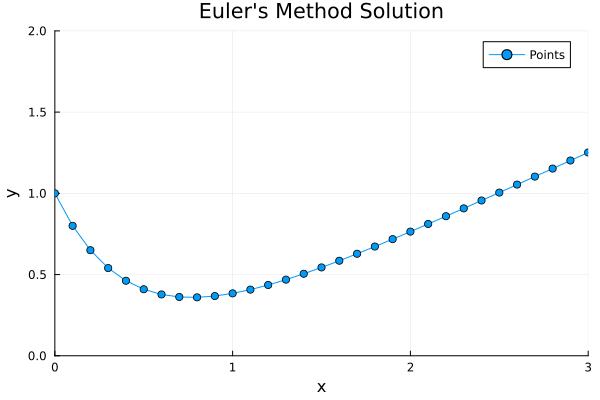

In [2]:
using Plots

# Definng the ODE function
f(x, y) = x - 2y

# Creating a function of euler method
function euler_method(f, x0, y0, h, num)
    x_values = [x0]
    y_values = [y0]
    for i in 1:num
        x_new = x_values[end] + h
        y_new = y_values[end] + h * f(x_values[end], y_values[end])
        push!(x_values, x_new)
        push!(y_values, y_new)
    end
    return x_values, y_values
end

# Set initial conditions and parameters
x0 = 0.0  # Initial x
y0 = 1.0  # Initial y
h = 0.1   # Step size
x_target = 3.0  # The value of x  
num = Int((x_target - x0) / h)  # Number of steps to reach x = 3

# Perform Euler's method
x_values, y_values = euler_method(f, x0, y0, h, num)

# Display the result
println("Approximate y at x = 3: $(y_values[end])")


# Create a plot of the solution with adjusted x-axis and y-axis measurements
plot(x_values, y_values, label="Points", xlabel="x", ylabel="y", legend=true, title="Euler's Method Solution", marker=:circle, xlim=(0.0, 3.0), ylim=(0.0, 2.0))

#### Heun's Method
For First Order ODEs Only

Smaller step-size (h) leads to more accurate results

Given:
$${dx \over dt} = F(x,t) $$

General Formula:
$$ x_{i+1} = x_{i} + h{{{F^{(0)}(x_{i+1}, t_{i+1}}) + F(x_{i}, t_{i})} \over 2} + \mathcal{O}(h^3)$$

Global Error:

$$E = \mathcal{O}(h^3){L \over h} = \mathcal{O}(h^2)$$

Steps:

1. Use Euler's Method to calculate intermediate value: $x^{(0)}_{i+1}$
* Euler's Method: $x^{(0)}_{i+1} = x_{i} + h{dx \over dt}|_{x = x_{i}, t = t_{i}}$
* Use initial conditions: $x_{0}, t_{0}$

2. After solving for $x^{(0)}_{i+1}$, substitute into Heun's Method General Formula


[-5.0, -5.92, -6.5560191149670395, -6.745970822221611, -6.5051013825308255, -5.98626918690898, -5.356056128177603, -4.726510141900921, -4.153033748665669, -3.6543720132596182, -3.230509380191054, -2.873628537350866, -2.5737190769463214, -2.3210742299010456, -2.107209474211967, -1.9250576072107075, -1.76886887289954, -1.6340154940511322, -1.5167862038386668, -1.4142030600873592, -1.3238692295742671, -1.24384681923858, -1.1725605317966574, -1.108722314546134, -1.0512725963602776, -0.9993344417765138, -0.952177694128868, -0.909190825561259, -0.8698587364616734, -0.8337451585640046, -0.800478633026604, -0.7697412765820001, -0.7412597323964644, -0.7147978414391071, -0.6901506757674571, -0.667139655467908, -0.6456085322951306, -0.6254200700234371, -0.6064532876629959, -0.5886011596281815, -0.571768688638672, -0.5558712840606896, -0.5408333916662622, -0.5265873312415366, -0.5130723067475367, -0.5002335603133021, -0.48802164659316666, -0.4763918082322558, -0.4653034365772883, -0.45471960451417

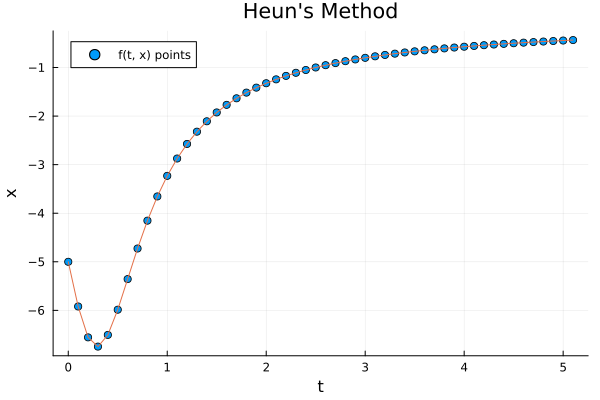

In [7]:
using Plots

# Define the ODE as a function dx/dt = f(x, t)
f(t, x) = t*x^2 + 2*x 

# initial conditions
x0 = -5.0
t0 = 0.0
h = 0.1
t_end = 5.0
tspan = [t0, t_end]

# Heun's method function to solve the ODE
function heuns_method(f, x0, t0, h, t_end)
    x_vals = [x0] # array for x
    t_vals = [t0] # array for y


    while t0 < t_end 
        # using euler's method to calculate for k0 and j0 or intermediate value of x0 and t0
        
        k0 = x0 + h * f(t0, x0) #intermediate value of x0, evaluate at inital conditions
        j0 = t0 + h #intermediate value of t0

        # Using heuns method
        x0 = x0 + 0.5 * h * (f(j0, k0) + f(t0, x0))
        t0 = j0

        push!(x_vals, x0)
        push!(t_vals, t0)

    end
    return x_vals, t_vals
end

x_vals, t_vals = heuns_method(f, x0, t0, h, t_end)

println(x_vals)

scatter(t_vals, x_vals, label = "f(t, x) points")
plot!(t_vals, x_vals, title = "Heun's Method", ylabel = "x", xlabel = "t", label ="")

#### Midpoint Method 
Madali lang din to. Parang euler lang den ang kaso nga lang half half siya kumbaga inuunti unti. Ito yung steps:

1. Solve for $x_{n+1/2}$: $x_{n} + \frac{h}{2}$ *Given yung h dito
2. Solve for $y_{n+1/2}$: $y_{n} + \frac{h}{2} * f(x_{n}, y_{n})$
3. Solve for the value of $f(x_{n+1/2}, y_{n+1/2})$
4. Solve for $x_{n+1}$: $x_{n} + h$
5. Solve for $y_{n+1}$: $y_{n} + h * f(x_{n+1/2}, y_{n+1/2})$
6. Repeat the steps 1 to 5 until the required value

Parang euler siya pero dito kukunin muna yung $x_{n+1/2}$ at $y_{n+1/2}$ bago magamit yung formula ng euler. Yung code ganon yung logics hehe tapos yung graph syempre hindi uli ako yon


Approximate y at x = 3.0: 1.2532458286140655


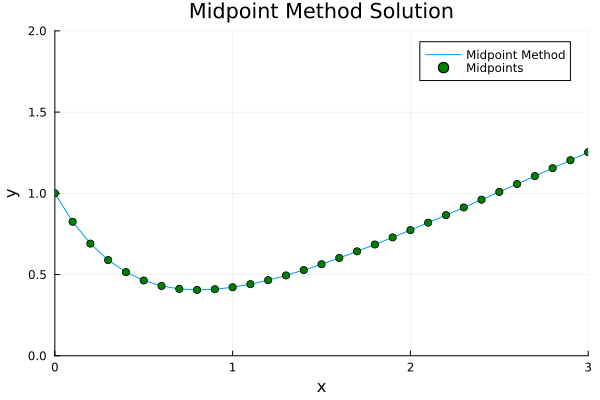

In [8]:
# Install the Plots package (if not already installed)
# using Pkg
# Pkg.add("Plots")

# Import necessary packages
using Plots

# Define the ODE function dy/dx = f(x, y)
f(x, y) = x - 2y

# Define the midpoint method for solving ODEs
function midpoint_method(f, x0, y0, h, num_steps)
    x_values = [x0]
    y_values = [y0]
    for i in 1:num_steps
        x_half = x_values[end] + 0.5 * h
        y_half = y_values[end] + 0.5 * h * f(x_values[end], y_values[end])
        x_new = x_values[end] + h
        y_new = y_values[end] + h * f(x_half, y_half)
        push!(x_values, x_new)
        push!(y_values, y_new)
    end
    return x_values, y_values
end

# Set initial conditions and parameters
x0 = 0.0  # Initial x
y0 = 1.0  # Initial y
h = 0.1   # Step size
x_max = 3.0  # Maximum x value
num_steps = Int((x_max - x0) / h)  # Number of steps

# Perform the midpoint method
x_values, y_values= midpoint_method(f, x0, y0, h, num_steps)

# Display the result
println("Approximate y at x = $x_max: $(y_values[end])")

# Create a plot of the solution and scatter plot of midpoints
plot(x_values, y_values, label="Midpoint Method", xlabel="x", ylabel="y", legend=true, title="Midpoint Method Solution", xlim=(0.0, x_max), ylim=(0.0, 2.0))
scatter!(x_values, y_values, label="Midpoints", color="green", markersize=4)

### **Euler's Method for Second-Order ODEs**

Same lang sa Euler's pero since second order, tatlo na yung nasa loob ng function
- $y'', y'$, and $y$

tapos yung $y$ is still a function of $x$ implicitly. So, if $y = f(x)$ and $y' = f(x, y)$, then

$y''(x)= f(x, y, y')$

To simplify $y'$ as first order, we assume:

$$ y'(x) = v(x) $$ 

so that

$$ y''(x) = v'(x) \\ 
    v'(x) = f(x, y, v)
$$ 

so yuung formula niya parang euler lang

$$ y_{n+1} = y_{n} + hf(x_{n}, y_{n}, v_{n}) \\ 
    v_{n+1} = v_{n} + hf(x_{n}, y_{n}, v_{n})
$$

yung x same lang
$$ x_{n+1} = x_{n} + h $$

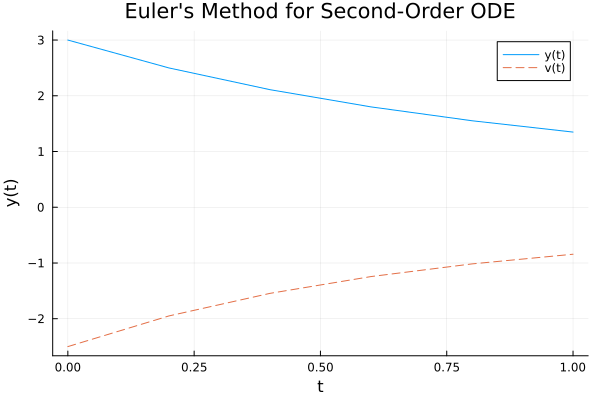

6×3 DataFrame
 Row │ Xval  Yval     Vval      
     │ Any   Any      Any       
─────┼──────────────────────────
   1 │ 0.0   3.0      -2.5
   2 │ 0.2   2.5      -1.95
   3 │ 0.4   2.11     -1.545
   4 │ 0.6   1.801    -1.2435
   5 │ 0.8   1.5523   -1.01625
   6 │ 1.0   1.34905  -0.842595

In [11]:
# Import the necessary packages
using Plots, DataFrames

TabI = DataFrame(Xval = [], Yval = [], Vval = []) # Table of values for x, y, and y'

# Arrays containing the x values, y values
function eulersSecondOrder(f::Function, x0, y0, v0, h, N)
    x_vals = [x0]
    y_vals = [y0]
    v_vals = [v0]
    push!(TabI, [x0, y0, v0])
    for n in 1:N
        x_new = x_vals[end] + h
        y_new = y_vals[end] + h * v_vals[end]
        v_new = v_vals[end] + h * f(x_vals[end], y_vals[end], v_vals[end])
        push!(x_vals, x_new)
        push!(y_vals, y_new)
        push!(v_vals, v_new)
        push!(TabI, [x_new, y_new, v_new])
    end
    return x_vals, y_vals, v_vals
end

# Define the ODE: y''
f(x, y, v) = -2v - 0.75y 

# Initial conditions
x0 = 0.0
y0 = 3.0
v0 = -2.5
num = 1.0
h = 0.2
N = Int((num - x0) / h)

# Apply Euler's method
x, y, v = eulersSecondOrder(f, x0, y0, v0, h, N)

# Arranging and displaying the table of values
reorderTab = [:Xval, :Yval, :Vval]
TabIReorder = TabI[:,reorderTab]
println(TabIReorder)

eulersSecondPlot = plot(x, y, xlabel="t", ylabel="y(t)", label="y(t)", title="Euler's Method for Second-Order ODE")
    plot!(x, v, label="v(t)", linestyle=:dash)
display(eulersSecondPlot)

#### **RK4 Method**
Eto algorithm ng RK ez lang

so meron ka initial conditions na x0 and y0 tapos values

$k_{1} = hf(x_{n}, y_{n})$

$k_{2} = hf(x_{n} + \frac{1}{2}h, y_{n} + \frac{1}{2}k_{1})$

$k_{3} = hf(x_{n} + \frac{1}{2}h, y_{n} + \frac{1}{2}k_{2})$

$k_{4} = hf(x_{n} + h, y_{n} + k_{1})$

tas yung $x$ and $y$ same lang as always

$x_{n+1}=x_{n}+h$

$y_{n+1}=y_{n}+\frac{1}{6}(k_{1}+2k_{2}+2k_{3}+k_{4})$


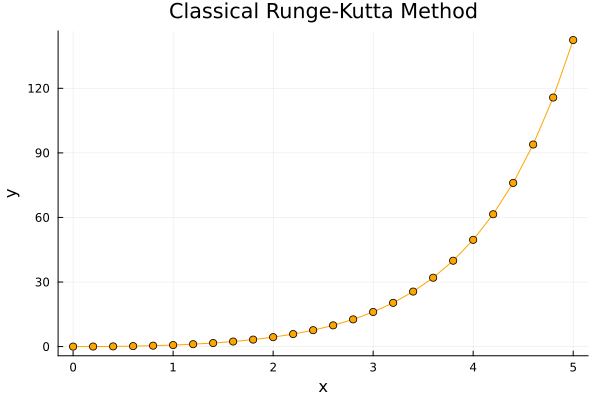

26×4 DataFrame
 Row │ Xval  Yval      YexactVal  Error       
     │ Any   Any       Any        Any         
─────┼────────────────────────────────────────
   1 │ 0.0   0.0       0.0        0.0
   2 │ 0.2   0.0214    0.0214028  2.75816e-6
   3 │ 0.4   0.091818  0.0918247  6.73764e-6
   4 │ 0.6   0.222106  0.222119   1.2344e-5
   5 │ 0.8   0.425521  0.425541   2.01027e-5
   6 │ 1.0   0.718251  0.718282   3.06919e-5
   7 │ 1.2   1.12007   1.12012    4.49845e-5
   8 │ 1.4   1.65514   1.6552     6.41015e-5
   9 │ 1.6   2.35294   2.35303    8.94784e-5
  10 │ 1.8   3.24952   3.24965    0.00012295
  11 │ 2.0   4.38889   4.38906    0.000166857
  12 │ 2.2   5.82479   5.82501    0.00022418
  13 │ 2.4   7.62288   7.62318    0.000298705
  14 │ 2.6   9.86334   9.86374    0.000395243
  15 │ 2.8   12.6441   12.6446    0.000519884
  16 │ 3.0   16.0849   16.0855    0.000680344
  17 │ 3.2   20.3316   20.3325    0.000886371
  18 │ 3.4   25.5629   25.5641    0.00115028
  19 │ 3.6   31.9967   31.9982    0.

In [19]:
# Import the necessary packages
using Plots, DataFrames

# Arrays containing the x values, y values
xn = Float64[]
yn = Float64[]
yExact = Float64[]
yError = Float64[]
TabI = DataFrame(Xval = [], Yval = [], YexactVal = [], Error = []) # Table of values for x and y

# Classical Runge-Kutta Function
function rungeKutta(f::Function, x0, y0, h, N)
    # Assigning the initial values
    x = x0 
    y = y0
    yTrue = exp(x) - x - 1
    err = yTrue - y

    # Adding the values to the arrays and table
    push!(xn, x)
    push!(yn, y)
    push!(TabI, [x, y, yTrue, err])

    # Iterating through the number of steps
    for n in 1:N
        # Computing for the four auxiliary quantities
        k1 = h * f(x, y)
        k2 = h * f((x + (1/2) * h), (y + (1/2) * k1))
        k3 = h * f((x + (1/2) * h), (y + (1/2) * k2))
        k4 = h * f(x + h, y + k3)
        
        # Computing for new x and y values
        x = x + h
        y = y + (1/6) * (k1 + (2 * k2) + (2 * k3) + k4)
        yTrue = exp(x) - x - 1
        err = yTrue - y

        # Adding the values to the arrays and table
        push!(xn, x)
        push!(yn, y)
        push!(TabI, [x, y, yTrue, err])
    end 
end 

f(x,y) = x + y # Function 
x0 = 0 # Initial x value
y0 = 0 # Initial y value
num = 5 # Number of steps
h = 0.2 # Step size
N = (num - x0) / h

# Solving for x and y values using the rungeKutta() function
rungeKutta(f, x0, y0, h, N)

# Arranging and displaying the table of values
reorderTab = [:Xval, :Yval, :YexactVal, :Error]
TabIReorder = TabI[:,reorderTab]
println(TabIReorder)

rkPlot = plot(xn, yn, color=:orange, label=false, title="Classical Runge-Kutta Method", xlabel="x", ylabel="y")
scatter!([xn], [yn], color=:orange, label=false)
display(rkPlot)

#### Euler's System

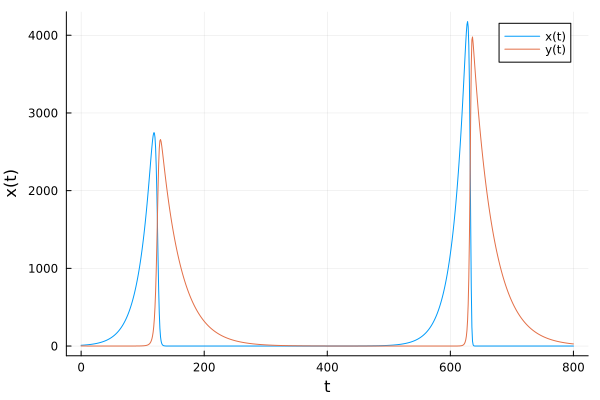

In [50]:
using Plots

function f(x, y, t)
    return 0.05x - 0.0002x*y
end

function g(x, y, t)
    return 0.00016x*y - 0.03y
end

function euler_system(x0, y0, t0, h, end_time)
    t_values = [t0]
    x_values = [x0]
    y_values = [y0]

    while t_values[end] < end_time
        t = t_values[end]
        x = x_values[end]
        y = y_values[end]

        delta_x = h * f(x, y, t)
        delta_y = h * g(x, y, t)

        x_new = x + delta_x
        y_new = y + delta_y
        t_new = t + h

        push!(t_values, t_new)
        push!(x_values, x_new)
        push!(y_values, y_new)
    end

    return t_values, x_values, y_values
end

# Example usage with initial conditions as floats
t_values, x_values, y_values = euler_system(10.0, 1.0, 0.0, 1., 800.0)


# for (t, x, y) in zip(t_values, x_values, y_values)
#     println("t = $t, x = $x, y = $y")
# end

# Create a plot
plot(t_values, x_values, label="x(t)", xlabel="t", ylabel="x(t)", legend=:topright)
plot!(t_values, y_values, label="y(t)")

## Integration

#### Trapezoidal Rule
Eto madali lang den. Gamit lang den yung formula para makuha yung area under the curve gamit yung mga trapezoid. Ang final formula lang dito eh yung $$\int_a^bf\left(x\right)dx\approx h [\frac{y_o}{2} + \sum_{i=1}^{n-1}y_i + \frac{y_n}{2}] $$


where $h = \frac{b-a}{n}$. Yung sa code ganon lang den naka for loop lang mag add yung mga nasa gitna. Pero yung graph ng trapezoid nde na ako yon si chatgpt gumawa non WHAHAH. 

Approximate value of the integral: 2868.872132034632


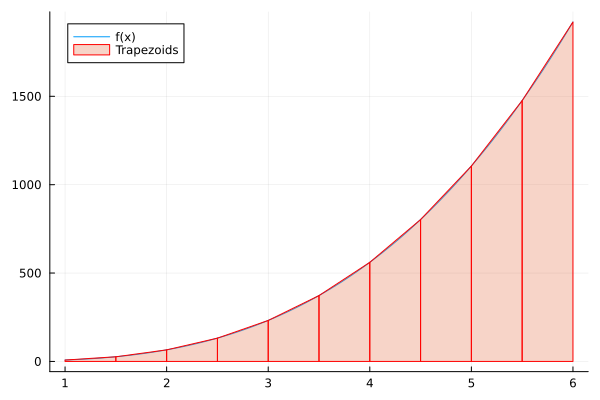

In [22]:
using Plots

# Define the function to be integrated
f(x) = 9*x^3 - 4*x + 3/x 

# Define the limits of integration
a = 1.0
b = 6.0

# Define the number of subintervals (*note: more subintervals for better accuracy)
n = 10

# Creating trapezoidal rule function
function trapezoidal_rule(f, a, b, n)
    h = (b - a) / n
    sum = 0.5 * (f(a) + f(b))
    for i in 1:n-1
        x_i = a + i * h
        sum += f(x_i)
    end
    return h * sum
end

# Calculate the approximate integral
approximate_value = trapezoidal_rule(f, a, b, n)

# Create a plot of the function and the trapezoids
x_values = range(a, stop=b, length=100)
y_values = f.(x_values)

x_trapezoids = []
y_trapezoids = []

for i in 1:n
    x_left = a + (i - 1) * (b - a) / n
    x_right = a + i * (b - a) / n
    y_left = f(x_left)
    y_right = f(x_right)
    
    # Define the vertices of the trapezoid
    x_trap = [x_left, x_right, x_right, x_left, x_left]
    y_trap = [0.0, 0.0, y_right, y_left, 0.0]
    
    x_trapezoids = [x_trapezoids; x_trap; NaN]  # Use NaN to separate trapezoids
    y_trapezoids = [y_trapezoids; y_trap; NaN]
end

# Display the result
println("Approximate value of the integral: $approximate_value")

plot(x_values, y_values, label="f(x)")
plot!(x_trapezoids, y_trapezoids, seriestype = :shape, linecolor = :red, fillalpha = 0.3, label="Trapezoids")


#### **Simpson's Rules**

eto lang formula na ginagamit niya basically eto na yung Simpson's Rule algorithm:

$$ S = \frac{h}{3} \left[ f_{0} + 4f_{1} + 2f_{2} + 4f_{3} + 2f_{4} + 4f_{5} + 4f_{n-1} + f_{n}\right]$$

    Updating registry at `C:\Users\ateneo\.julia\registries\General.toml`


   Resolving package versions...


   Installed EpollShim_jll ─ v0.0.20230411+0


   Installed QuadGK ──────── v2.9.1


    Updating `C:\Users\ateneo\.julia\environments\v1.9\Project.toml`
  [1fd47b50] + QuadGK v2.9.1
    Updating `C:\Users\ateneo\.julia\environments\v1.9\Manifest.toml`


  [1fd47b50] + QuadGK v2.9.1
  [2702e6a9] + EpollShim_jll v0.0.20230411+0


Precompiling

project...


  ✓ EpollShim_jll


  ✓ QuadGK


  ✓ Wayland_jll


  ✓ xkbcommon_jll


  ✓ Qt6Base_jll


  ✓ GR_jll


  ✓ GR


  ✓ Plots


  ✓ Plots → IJuliaExt


  ✓ Plots → UnitfulExt
  10 dependencies successfully precompiled in 237 seconds. 172 already precompiled.
  5 dependencies precompiled but different versions are currently loaded. Restart julia to access the new versions

Integral estimate: 

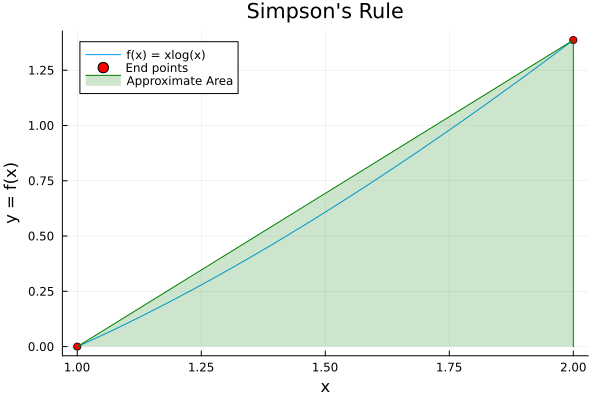

0.6362943611198948
Actual integral: 0.6362943611198906

In [24]:
using Pkg
Pkg.add("QuadGK")

# Import the necessary packages
using QuadGK, Plots

# Composite Simpson's Rule Function
function compositeSimpsons(f::Function, a, b, n)
    if n % 2 != 0
        error("Number of intervals (n) must be even for Simpson's Rule.")
    end

    h = (b-a)/n
    x = range(a, stop=b, length=n+1)
    y = f.(x)

    integral = h/3 * (y[1] + 4 * sum(y[2:2:end-1]) + 2 * sum(y[3:2:end-2]) + y[end])
    #= Note: 
        sum(y[2:2:end-1]) --> summation of every term multiplied by 4. It starts at the second term at intervals of two until the second to the last term
        sum(y[3:2:end-2]) --> summation of every term multiplied by 2. It starts at the third term at intervals of two until the third to the last term
    =#
    return integral
end 

# Parameters
f(x) = x * log(x) # Function 
a = 1
b = 2
n = 1000 # Number of intervals

# Using the Simpson's Rule to solve for the integral
integral = compositeSimpsons(f, a, b, n)
trueIntegral, err = quadgk(f, a, b) 

println("Integral estimate: ", integral)
println("Actual integral: ", trueIntegral)

# Generate points for plotting
x_val = range(a, stop=b, length=1000)
y_val = f.(x_val)

# Plot the function and the approximate area
using Plots
simpsonsPlot = plot(x_val, y_val, xlabel="x", ylabel="y = f(x)", label="f(x) = xlog(x)", legend=:topleft)
scatter!([a, b], [f(a), f(b)], color=:red, label="End points")
plot!([a, a, b, b], [0, f(a), f(b), 0], fillalpha=0.2, fill=true, color=:green, label="Approximate Area")
title!("Simpson's Rule")
display(simpsonsPlot)

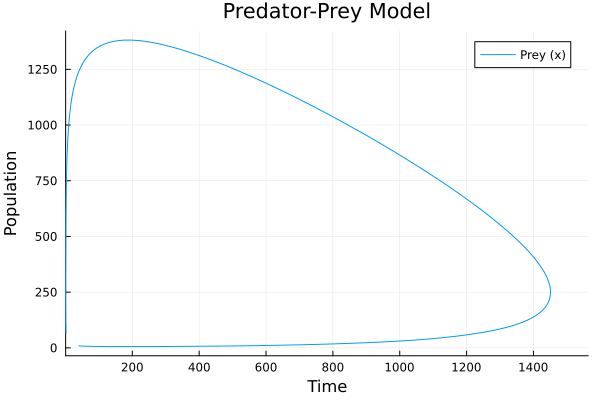

In [27]:
using DifferentialEquations
using Plots

# Define the predator-prey ODE system
function predator_prey(du, u, p, t)
    a, b, c, d = p
    x, y = u
    du[1] = a * x - b * x * y
    du[2] = c * x * y - d * y
end

# Set initial conditions, parameters, and time span
u0 = [40.0, 9.0]  # Initial conditions [initial x, initial y]
p = [0.05, 0.0002, 0.00016, 0.03]  # Parameters [a, b, c, d]
tspan = (0.0, 200.0)  # Time span from 0 to 200

# Create the ODE problem
prob = ODEProblem(predator_prey, u0, tspan, p)

# Choose a solver and solve the ODE
sol = solve(prob, Tsit5())

# Plot the results
plt = plot(sol, vars=(1, 2), label=["Prey (x)" "Predator (y)"])
xlabel!("Time")
ylabel!("Population")
title!("Predator-Prey Model")

# Show the plot
display(plt)

### Simpson's Integral

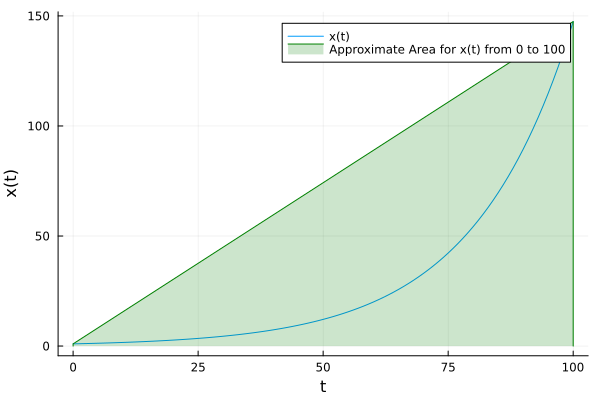

Estimated area under the curve for x(t) from 0 to 100: 2930.4236504040855


In [28]:
using Plots
gr()  # Set the plot backend to GR

function f(x, y, t)
    return 0.05x - 0.0002x * y
end

function g(x, y, t)
    return 0.00016x * y - 0.03y
end

function rk4_system(x0, y0, t0, h, end_time)
    t_values = [t0]
    x_values = [x0]
    y_values = [y0]

    while t_values[end] < end_time
        t = t_values[end]
        x = x_values[end]
        y = y_values[end]

        k1x = h * f(x, y, t)
        k1y = h * g(x, y, t)

        k2x = h * f(x + 0.5 * k1x, y + 0.5 * k1y, t + 0.5 * h)
        k2y = h * g(x + 0.5 * k1x, y + 0.5 * k1y, t + 0.5 * h)

        k3x = h * f(x + 0.5 * k2x, y + 0.5 * k2y, t + 0.5 * h)
        k3y = h * g(x + 0.5 * k2x, y + 0.5 * k2y, t + 0.5 * h)

        k4x = h * f(x + k3x, y + k3y, t + h)
        k4y = h * g(x + k3x, y + k3y, t + h)

        x_new = x + (k1x + 2.0 * k2x + 2.0 * k3x + k4x) / 6.0
        y_new = y + (k1y + 2.0 * k2y + 2.0 * k3y + k4y) / 6.0
        t_new = t + h

        push!(t_values, t_new)
        push!(x_values, x_new)
        push!(y_values, y_new)
    end

    return t_values, x_values, y_values
end

# Example usage with initial conditions as floats
t_values, x_values, y_values = rk4_system(1.0, 1.0, 0.0, 1.0, 100.0)

# Create a plot of x(t)
Plot = plot(t_values, x_values, label="x(t)", xlabel="t", ylabel="x(t)", legend=:topright)

# Estimate the area under the curve using Simpson's rule
function simpsons_rule(x, h)
    n = length(x)
    if n % 2 == 0
        error("Number of points must be odd for Simpson's rule.")
    end
    integral = x[1] + x[end] + 4 * sum(x[2:2:end-1]) + 2 * sum(x[3:2:end-2])
    integral *= h / 3
    return integral
end

# Estimate the area under the curve using your custom Simpson's rule for x(t) from 0 to 100
t_min = 0
t_max = 100
idx_min = findfirst(t_values .>= t_min)
idx_max = findfirst(t_values .>= t_max)

if idx_min === nothing || idx_max === nothing
    println("Integration bounds are outside the range of t_values.")
else
    area_x = simpsons_rule(x_values[idx_min:idx_max], t_values[2] - t_values[1])
    println("Estimated area under the curve for x(t) from 0 to 100: $area_x")

    # Shade the area under the curve for x(t) from 0 to 100
    plot!([t_values[idx_min], t_values[idx_min], t_values[idx_max], t_values[idx_max]],
        [0, x_values[idx_min], x_values[idx_max], 0], fillalpha=0.2, fill=true, color=:green, label="Approximate Area for x(t) from 0 to 100")
end

# Display the plot
display(Plot)

#### Trapezoidal

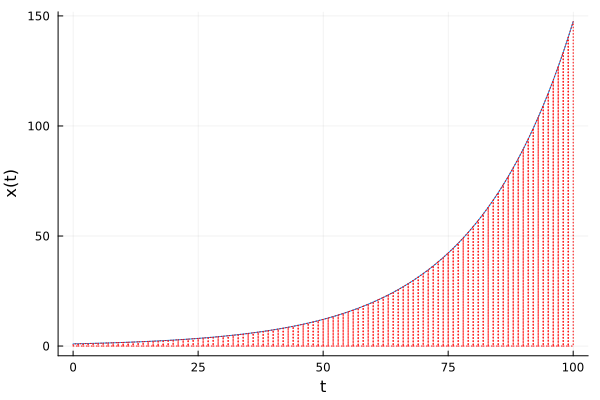

Estimated area under the curve for x(t) from 0 to 100 using trapezoidal rule: 2931.033538011726


The result of the integration is: 2931.059070306502
The error estimate is: 4.360394496632494e-5


In [32]:
using Plots
gr()  # Set the plot backend to GR

function f(x, y, t)
    return 0.05x - 0.0002x * y
end

function g(x, y, t)
    return 0.00016x * y - 0.03y
end

function rk4_system(x0, y0, t0, h, end_time)
    t_values = [t0]
    x_values = [x0]
    y_values = [y0]

    while t_values[end] < end_time
        t = t_values[end]
        x = x_values[end]
        y = y_values[end]

        k1x = h * f(x, y, t)
        k1y = h * g(x, y, t)

        k2x = h * f(x + 0.5 * k1x, y + 0.5 * k1y, t + 0.5 * h)
        k2y = h * g(x + 0.5 * k1x, y + 0.5 * k1y, t + 0.5 * h)

        k3x = h * f(x + 0.5 * k2x, y + 0.5 * k2y, t + 0.5 * h)
        k3y = h * g(x + 0.5 * k2x, y + 0.5 * k2y, t + 0.5 * h)

        k4x = h * f(x + k3x, y + k3y, t + h)
        k4y = h * g(x + k3x, y + k3y, t + h)

        x_new = x + (k1x + 2.0 * k2x + 2.0 * k3x + k4x) / 6.0
        y_new = y + (k1y + 2.0 * k2y + 2.0 * k3y + k4y) / 6.0
        t_new = t + h

        push!(t_values, t_new)
        push!(x_values, x_new)
        push!(y_values, y_new)
    end

    return t_values, x_values, y_values
end

# Example usage with initial conditions as floats
t_values, x_values, y_values = rk4_system(1.0, 1.0, 0.0, 1.0, 100.0)

# Create a plot of x(t)
Plot = plot(t_values, x_values, label="x(t)", xlabel="t", ylabel="x(t)", legend=:topright)

# Estimate the area under the curve using Simpson's rule
function trapezoidal_rule(f, a, b, n)
    h = (b - a) / n
    sum = 0.5 * (f(a) + f(b))
    for i in 1:n-1
        x_i = a + i * h
        sum += f(x_i)
    end
    return h * sum
end

# Estimate the area under the curve using the trapezoidal rule for x(t) from 0 to 100
t_min = 0
t_max = 100
idx_min = findfirst(t_values .>= t_min)
idx_max = findfirst(t_values .>= t_max)

if idx_min === nothing || idx_max === nothing
    println("Integration bounds are outside the range of t_values.")
else
    x_subset = x_values[idx_min:idx_max]
    t_subset = t_values[idx_min:idx_max]

    function f(x)
        # Linearly interpolate x(t) values
        i = searchsortedfirst(t_subset, x)
        if i == 1
            return x_subset[1]
        elseif i == length(t_subset)
            return x_subset[end]
        else
            t1, t2 = t_subset[i], t_subset[i + 1]
            x1, x2 = x_subset[i], x_subset[i + 1]
            return x1 + (x2 - x1) * (x - t1) / (t2 - t1)
        end
    end

    area_x = trapezoidal_rule(f, t_subset[1], t_subset[end], length(t_subset) - 1)
    println("Estimated area under the curve for x(t) from 0 to 100 using trapezoidal rule: $area_x")

    # Show trapezoids
    for i in 1:length(t_subset) - 1
        plot!([t_subset[i], t_subset[i + 1], t_subset[i + 1], t_subset[i], t_subset[i]],
            [0, 0, x_subset[i + 1], x_subset[i], 0], color=:red, linestyle=:dot, legend=false)
    end
end


# Display the plot
display(Plot)

# Perform the definite integration
result, integration_error = quadgk(f, 0, 100)

# Print the result and error estimate
println("The result of the integration is: $result")
println("The error estimate is: $integration_error")

# This is for checking (Definite Integration and ODE Solver)

In [33]:
using QuadGK

# Define the function to integrate
f(x) = x^2

# Define the integration bounds
a = 0.0
b = 1.0

# Perform the definite integration
result, integration_error = quadgk(f, a, b)

# Print the result and error estimate
println("The result of the integration is: $result")
println("The error estimate is: $integration_error")


The result of the integration is: 0.3333333333333333
The error estimate is: 0.0


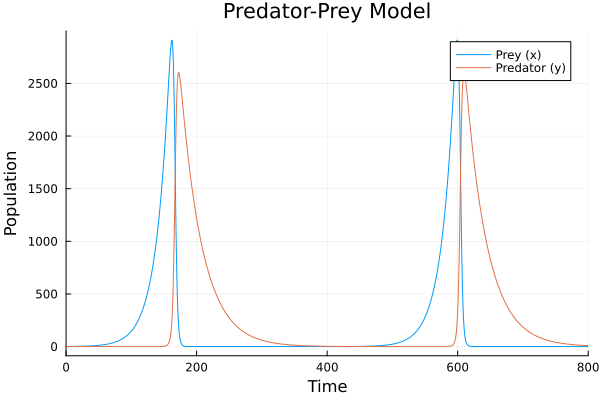

In [46]:
# Step 1: Install the DifferentialEquations.jl package (if not already installed)
# using Pkg
# Pkg.add("DifferentialEquations")

# Step 2: Import the necessary packages
using DifferentialEquations
using Plots  # For visualization

# Step 3: Define the predator-prey system of ODEs
function predator_prey(du, u, p, t)
    a, b, c, d = p
    x, y = u
    du[1] = a * x - b * x * y
    du[2] = c * x * y - d * y
end

# Step 4: Set up initial conditions and time span
u0 = [1., 1.]  # Initial conditions for x and y
tspan = (0.0, 800.0)  # Time span from 0 to 800

# Step 5: Define parameters
p = [0.05, 0.0002, 0.00016, 0.03]  # Parameters a, b, c, and d

# Step 6: Create the ODE problem
prob = ODEProblem(predator_prey, u0, tspan, p)

# Step 7: Choose a solver and solve the ODEs
sol = solve(prob, Tsit5())  # Using the Tsit5 solver, you can choose a different one if needed

# Step 8: Analyze and visualize the results
plt1 = plot(sol, label=["Prey (x)" "Predator (y)"], xlabel="Time", ylabel="Population", title="Predator-Prey Model")

# Save the plot as an image file (e.g., PNG)
display(plt1)
